# Projet Fil Rouge Solution

## A. Importer les librairies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2 as pg
import psycopg2.extras as extras


## B. Lire le fichier listings.csv

### B.1 Lire le fichier csv

In [3]:
# reading the data
listings = pd.read_csv('listings.csv')
listings


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,20230313171257,2023-03-14,city scrape,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.83,4.95,4.54,7510402838018,f,1,1,0,0,1.99
1,7397,https://www.airbnb.com/rooms/7397,20230313171257,2023-03-29,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.88,4.93,4.73,7510400829623,f,2,2,0,0,2.26
2,7964,https://www.airbnb.com/rooms/7964,20230313171257,2023-03-14,city scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.04
3,9359,https://www.airbnb.com/rooms/9359,20230313171257,2023-03-14,city scrape,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,https://a0.muscache.com/pictures/c2965945-061f...,28422,...,NaN,NaN,NaN,"Available with a mobility lease only (""bail mo...",f,1,1,0,0,NaN
4,9952,https://www.airbnb.com/rooms/9952,20230313171257,2023-03-14,city scrape,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...","Vibrant neighborhood, full of bars, cafés, fre...",https://a0.muscache.com/pictures/ae822d16-74d2...,33534,...,4.84,4.88,4.91,7511101582862,f,1,1,0,0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56721,843263965560420069,https://www.airbnb.com/rooms/843263965560420069,20230313171257,2023-03-14,city scrape,Luxury 4 Bedrooms 3 Bathrooms Apartment - Ope...,Located in the heart of the 1st arrondissement...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,156775524,...,NaN,NaN,NaN,7510105700688,t,66,66,0,0,NaN
56722,843264086459366855,https://www.airbnb.com/rooms/843264086459366855,20230313171257,2023-03-14,city scrape,Luxury 3 Bedrooms 2 Bathrooms Apartment - Ope...,Located in the heart of the 1st arrondissement...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,156775524,...,NaN,NaN,NaN,7510105700589,t,66,66,0,0,NaN
56723,843268818718844445,https://www.airbnb.com/rooms/843268818718844445,20230313171257,2023-03-14,city scrape,Chic flat Place des Vosges,"Bel appartement de 100m2, au 1er étage d'un un...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1112584,...,NaN,NaN,NaN,7510408066120,t,92,90,2,0,NaN
56724,843270207995447181,https://www.airbnb.com/rooms/843270207995447181,20230313171257,2023-03-14,city scrape,Bel Appartement Studio Moderne Mezzanine - 4P,Cet appartement de 30m2 situé au rez-de-chauss...,Le 2ème arrondissement se situe dans le centre...,https://a0.muscache.com/pictures/prohost-api/H...,472186398,...,NaN,NaN,NaN,7510206096183,t,12,12,0,0,NaN


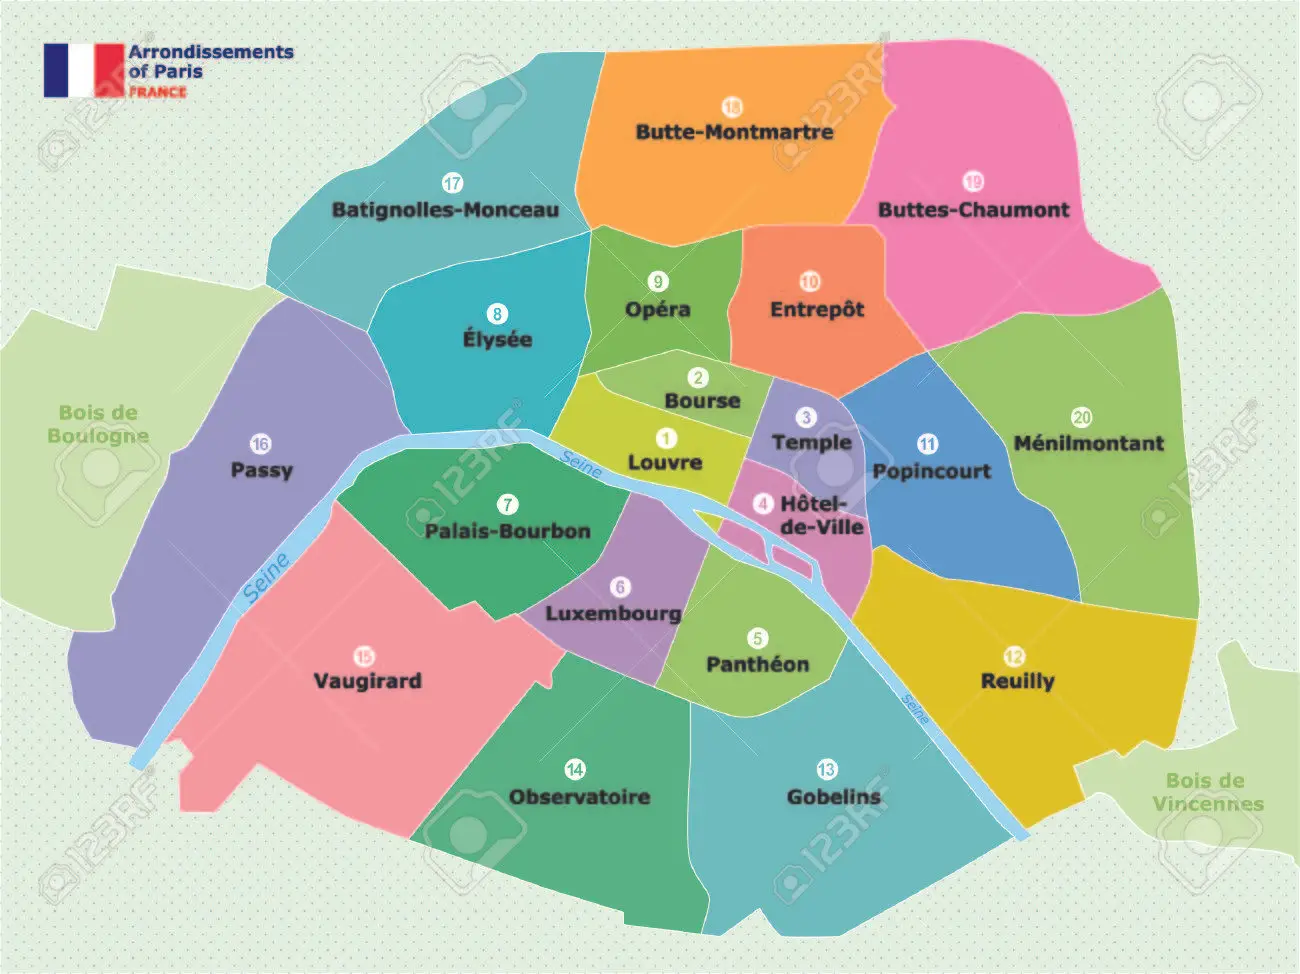

## C. Explorer la base de donnee avec Pandas

### C.1. Afficher le type des differents colonnes dans la base de donnees 

In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56726 entries, 0 to 56725
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            56726 non-null  int64  
 1   listing_url                                   56726 non-null  object 
 2   scrape_id                                     56726 non-null  int64  
 3   last_scraped                                  56726 non-null  object 
 4   source                                        56726 non-null  object 
 5   name                                          56689 non-null  object 
 6   description                                   56161 non-null  object 
 7   neighborhood_overview                         32447 non-null  object 
 8   picture_url                                   56725 non-null  object 
 9   host_id                                       56726 non-null 

### C.2. Afficher les statisques primaires de la base de donnees

In [5]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.672600e+04,5.672600e+04,5.672600e+04,56708.000000,56708.000000,0.0,56726.000000,56726.000000,56726.000000,0.0,...,45112.000000,45099.000000,45109.000000,45097.000000,45095.000000,56726.000000,56726.000000,56726.000000,56726.000000,45631.000000
mean,1.973188e+17,2.023031e+13,1.295704e+08,21.893948,32.803238,NaN,48.864290,2.344470,3.048919,NaN,...,4.589212,4.786115,4.800066,4.799382,4.590021,15.104643,14.330748,0.622307,0.015742,1.009644
std,3.209526e+17,2.534788e+01,1.547738e+08,93.175233,143.030468,NaN,0.018055,0.033243,1.611676,NaN,...,0.519631,0.401047,0.396593,0.344041,0.470871,51.584652,51.453338,4.438866,0.263379,1.362947
min,5.396000e+03,2.023031e+13,2.750000e+02,1.000000,1.000000,NaN,48.816080,2.235490,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.629361e+07,2.023031e+13,1.537846e+07,1.000000,1.000000,NaN,48.851310,2.323630,2.000000,NaN,...,4.440000,4.750000,4.750000,4.750000,4.470000,1.000000,1.000000,0.000000,0.000000,0.160000
50%,3.663390e+07,2.023031e+13,4.925020e+07,1.000000,2.000000,NaN,48.865590,2.347680,2.000000,NaN,...,4.740000,4.910000,4.940000,4.900000,4.700000,1.000000,1.000000,0.000000,0.000000,0.520000
75%,5.978393e+17,2.023031e+13,2.125869e+08,3.000000,4.000000,NaN,48.878690,2.368830,4.000000,NaN,...,4.950000,5.000000,5.000000,5.000000,4.880000,2.000000,1.000000,0.000000,0.000000,1.330000
max,8.463336e+17,2.023031e+13,5.049987e+08,2139.000000,3629.000000,NaN,48.901670,2.467120,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,447.000000,447.000000,91.000000,10.000000,49.550000


### C.3. Afficher les noms des colonnes dans la base de donnees

In [6]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### C.4. Combien de lignes et de colonnes contient la base de donnee?

## D. Nettoyage de Donnees et Pre-Traitement

### D.1. Enlever les colonnes non necessaires

In [7]:
keep = ['id', 'listing_url', 'name', 'description','neighborhood_overview','host_id','host_url','host_name','neighbourhood','neighbourhood_cleansed', 'latitude','longitude','room_type','price','minimum_nights','availability_365','number_of_reviews','last_review', 'calculated_host_listings_count','reviews_per_month']

listings_new = listings.drop(columns=listings.columns.difference(keep))
listings_new

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month
0,5396,https://www.airbnb.com/rooms/5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",7903,https://www.airbnb.com/users/show/7903,Borzou,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,$124.00,15,184,332,2023-02-18,1,1.99
1,7397,https://www.airbnb.com/rooms/7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,2626,https://www.airbnb.com/users/show/2626,Franck,NaN,Hôtel-de-Ville,48.859090,2.353150,Entire home/apt,$130.00,10,171,329,2023-03-15,2,2.26
2,7964,https://www.airbnb.com/rooms/7964,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,22155,https://www.airbnb.com/users/show/22155,Anaïs,NaN,Opéra,48.874170,2.342450,Entire home/apt,$140.00,4,48,6,2015-09-14,1,0.04
3,9359,https://www.airbnb.com/rooms/9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,NaN,28422,https://www.airbnb.com/users/show/28422,Bernadette,NaN,Louvre,48.860060,2.348630,Entire home/apt,$75.00,180,264,0,NaN,1,NaN
4,9952,https://www.airbnb.com/rooms/9952,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...","Vibrant neighborhood, full of bars, cafés, fre...",33534,https://www.airbnb.com/users/show/33534,Elisabeth,"Paris, Ile-de-France, France",Popincourt,48.863730,2.370930,Entire home/apt,$160.00,4,141,43,2022-10-21,1,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56721,843263965560420069,https://www.airbnb.com/rooms/843263965560420069,Luxury 4 Bedrooms 3 Bathrooms Apartment - Ope...,Located in the heart of the 1st arrondissement...,NaN,156775524,https://www.airbnb.com/users/show/156775524,Merveil,NaN,Louvre,48.866576,2.334990,Entire home/apt,$640.00,1,359,0,NaN,66,NaN
56722,843264086459366855,https://www.airbnb.com/rooms/843264086459366855,Luxury 3 Bedrooms 2 Bathrooms Apartment - Ope...,Located in the heart of the 1st arrondissement...,NaN,156775524,https://www.airbnb.com/users/show/156775524,Merveil,NaN,Louvre,48.864663,2.334365,Entire home/apt,$538.00,1,340,0,NaN,66,NaN
56723,843268818718844445,https://www.airbnb.com/rooms/843268818718844445,Chic flat Place des Vosges,"Bel appartement de 100m2, au 1er étage d'un un...",NaN,1112584,https://www.airbnb.com/users/show/1112584,IntoParis,NaN,Hôtel-de-Ville,48.853447,2.364120,Entire home/apt,$600.00,5,59,0,NaN,92,NaN
56724,843270207995447181,https://www.airbnb.com/rooms/843270207995447181,Bel Appartement Studio Moderne Mezzanine - 4P,Cet appartement de 30m2 situé au rez-de-chauss...,Le 2ème arrondissement se situe dans le centre...,472186398,https://www.airbnb.com/users/show/472186398,Juliana,"Paris, Île-de-France, France",Bourse,48.869729,2.349743,Entire home/apt,$181.00,1,236,0,NaN,12,NaN


### D.2. Verifier combien de valeurs nulles par colonne

In [8]:
listings_new.isnull().sum()


id                                    0
listing_url                           0
name                                 37
description                         565
neighborhood_overview             24279
host_id                               0
host_url                              0
host_name                            18
neighbourhood                     24279
neighbourhood_cleansed                0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
availability_365                      0
number_of_reviews                     0
last_review                       11095
calculated_host_listings_count        0
reviews_per_month                 11095
dtype: int64

### D.3. Afficher la colonne last review

In [9]:
listings_new['last_review']

0        2023-02-18
1        2023-03-15
2        2015-09-14
3               NaN
4        2022-10-21
            ...    
56721           NaN
56722           NaN
56723           NaN
56724           NaN
56725           NaN
Name: last_review, Length: 56726, dtype: object

### D4. Convertir la colonne last_review en datetime

In [10]:
listings_new['last_review'] = pd.to_datetime(listings_new['last_review'])
listings_new['last_review']

0       2023-02-18
1       2023-03-15
2       2015-09-14
3              NaT
4       2022-10-21
           ...    
56721          NaT
56722          NaT
56723          NaT
56724          NaT
56725          NaT
Name: last_review, Length: 56726, dtype: datetime64[ns]

In [11]:
#Verifier le nouveau type 
listings_new['last_review'][0]

Timestamp('2023-02-18 00:00:00')

In [12]:
max_date = listings_new['last_review'].max()
max_date

Timestamp('2023-03-26 00:00:00')

### D.5. Remplacer les valuers nulles dans last_review avec la date maximale de last_review

In [13]:
listings_new['last_review'] = listings_new['last_review'].fillna(max_date)
listings_new['last_review']

0       2023-02-18
1       2023-03-15
2       2015-09-14
3       2023-03-26
4       2022-10-21
           ...    
56721   2023-03-26
56722   2023-03-26
56723   2023-03-26
56724   2023-03-26
56725   2023-03-26
Name: last_review, Length: 56726, dtype: datetime64[ns]

### D.6. Remplacer les valuers nulles dans reviews_per_month avec 0

In [14]:
listings_new['reviews_per_month']= listings_new['reviews_per_month'].fillna(0)
listings_new['reviews_per_month']

0        1.99
1        2.26
2        0.04
3        0.00
4        0.35
         ... 
56721    0.00
56722    0.00
56723    0.00
56724    0.00
56725    0.00
Name: reviews_per_month, Length: 56726, dtype: float64

In [15]:
# D.7. Remplacer les valuers nulles dans name, host_name, description, neighbourhood_overview et neighbourhood avec ""

In [16]:
listings_new[['name','host_name','description','neighborhood_overview','neighbourhood']]=listings_new[['name','host_name','description','neighborhood_overview','neighbourhood']].fillna(0)

### D.8. Verifier s'il y en a enore de valeurs nulles

In [17]:
listings_new.isnull().sum()

id                                0
listing_url                       0
name                              0
description                       0
neighborhood_overview             0
host_id                           0
host_url                          0
host_name                         0
neighbourhood                     0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
availability_365                  0
number_of_reviews                 0
last_review                       0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

### D.9. Nettoyer la colonne Price pour etre un nombre entier sans le symbole '$' 

In [18]:
listings_new['price']= listings_new['price'].str.replace('$',' ')
listings_new['price']= listings_new['price'].str.replace(',','')


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9368\1939014761.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_new['price']= listings_new['price'].str.replace('$',' ')


### D.10. Ajouter une colonne contenant le nombre de nuits reservees durant les 365 jours de l'an

In [19]:
listings_new['nuits_reservees_365']= 365-listings_new['availability_365']
listings_new.head()

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,...,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month,nuits_reservees_365
0,5396,https://www.airbnb.com/rooms/5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",7903,https://www.airbnb.com/users/show/7903,Borzou,"Paris, Ile-de-France, France",Hôtel-de-Ville,...,2.35835,Entire home/apt,124.00,15,184,332,2023-02-18,1,1.99,181
1,7397,https://www.airbnb.com/rooms/7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",0,2626,https://www.airbnb.com/users/show/2626,Franck,0,Hôtel-de-Ville,...,2.35315,Entire home/apt,130.00,10,171,329,2023-03-15,2,2.26,194
2,7964,https://www.airbnb.com/rooms/7964,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",0,22155,https://www.airbnb.com/users/show/22155,Anaïs,0,Opéra,...,2.34245,Entire home/apt,140.00,4,48,6,2015-09-14,1,0.04,317
3,9359,https://www.airbnb.com/rooms/9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,0,28422,https://www.airbnb.com/users/show/28422,Bernadette,0,Louvre,...,2.34863,Entire home/apt,75.00,180,264,0,2023-03-26,1,0.00,101
4,9952,https://www.airbnb.com/rooms/9952,Paris petit coin douillet,"Je suis une dame retraitée, qui propose un agr...","Vibrant neighborhood, full of bars, cafés, fre...",33534,https://www.airbnb.com/users/show/33534,Elisabeth,"Paris, Ile-de-France, France",Popincourt,...,2.37093,Entire home/apt,160.00,4,141,43,2022-10-21,1,0.35,224


## E. Analyse de Donnees

### E1. Combien d'hôtes uniques il y en a dans la base de donnee

In [20]:
listings_new['host_id'].nunique()

42490

### E2. Afficher les  ID des top 10 hôtes qui ont le plus nombre de logements (listings) sur airbnb
(Sauvegarder les resultats dans une dataframe "top_hosts_df")

In [21]:
top_hosts_df = listings_new.groupby('host_id')['calculated_host_listings_count'].count().nlargest(20)
top_hosts_df 



host_id
314994947    447
50978178     230
50502817     214
7642792      196
440295601    195
33889201     182
458533553    165
26981054     156
402191311    141
6053288      131
51567288     106
460047164    104
2107478       95
435014515     94
1112584       92
440992832     91
440992928     91
21630783      88
374553401     87
147018685     86
Name: calculated_host_listings_count, dtype: int64

In [22]:
#Sauvegarder les resultats dans une dataframe "top_hosts_df
top_hosts_df = pd.DataFrame(top_hosts_df)
top_hosts_df = top_hosts_df.reset_index() 
top_hosts_df

,host_id,calculated_host_listings_count
0,314994947,447
1,50978178,230
2,50502817,214
3,7642792,196
4,440295601,195
5,33889201,182
6,458533553,165
7,26981054,156
8,402191311,141
9,6053288,131


In [23]:
### Verifier le total maximal de listings en utilisant la colonne calculated_host_listings_count
maximum = top_hosts_df["calculated_host_listings_count"].max()


#### Le nombre de listings sur airbnb du host qui a le plus de chambres sur airbnb est ??? listings.

### E.3. Trouver l'ID de l'hôte avec le plus grand nombre de listings

In [24]:
maximum =  top_hosts_df["calculated_host_listings_count"].max()
top_hosts_df["host_id"][top_hosts_df["calculated_host_listings_count"] == maximum]

0    314994947
Name: host_id, dtype: int64

### E.4. Afficher les regions (neighbourhood_cleansed) uniques

In [25]:
listings_new['neighbourhood_cleansed'].unique()

array(['Hôtel-de-Ville', 'Opéra', 'Louvre', 'Popincourt',
       'Buttes-Montmartre', 'Luxembourg', 'Gobelins', 'Entrepôt',
       'Batignolles-Monceau', 'Temple', 'Buttes-Chaumont', 'Bourse',
       'Ménilmontant', 'Observatoire', 'Panthéon', 'Vaugirard', 'Élysée',
       'Reuilly', 'Passy', 'Palais-Bourbon'], dtype=object)

### E.5. Afficher les types de logements uniques

In [26]:
listings_new['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### E.6. Afficher les top 10 logements (listings) avec le plus nombre de reviews

In [27]:
listings_new.nlargest(10, 'number_of_reviews')

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,...,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month,nuits_reservees_365
21647,26244787,https://www.airbnb.com/rooms/26244787,"Double/Twin Room, close to Opera and the Louvr...",<b>The space</b><br />The Daunou Opera enjoys ...,0,98020850,https://www.airbnb.com/users/show/98020850,Lionel,0,Bourse,...,2.33246,Hotel room,364.00,1,337,2524,2023-03-12,8,49.55,28
14749,17222007,https://www.airbnb.com/rooms/17222007,Sweet & cosy room next to Canal Saint Martin ❤️,The room is located right in the heart of la R...,The room I offer is right in the middle of a v...,84901734,https://www.airbnb.com/users/show/84901734,Alexandra,"Paris, Île-de-France, France",Entrepôt,...,2.36027,Private room,147.00,1,99,2052,2023-02-27,5,28.79,266
31468,41020735,https://www.airbnb.com/rooms/41020735,"Bed in Dorm of 8 Beds ""The Big One"" in Paris","Welcome to Les Piaules, our hostel & bar in do...",Les Piaules hostel is located in Paris arty & ...,315206797,https://www.airbnb.com/users/show/315206797,Les Piaules,"Paris, Île-de-France, France",Popincourt,...,2.37871,Shared room,41.00,1,364,1647,2023-02-27,11,44.19,1
26941,35145338,https://www.airbnb.com/rooms/35145338,Nice Room for 2 people,Hotel de l'Aqueduc is located near the center ...,0,264483496,https://www.airbnb.com/users/show/264483496,Hotel De L’Aqueduc,0,Entrepôt,...,2.36199,Hotel room,124.00,1,227,1433,2023-03-10,4,35.83,138
30717,40194697,https://www.airbnb.com/rooms/40194697,Comfortable bed in shared rooms of 8 in Paris 12e,Kick your journey off with a coffee on the 8th...,"Make your stay a magic, cocooning and romantic...",309707704,https://www.airbnb.com/users/show/309707704,The People Paris Bercy,"Paris, Île-de-France, France",Reuilly,...,2.39251,Shared room,42.00,1,106,1420,2023-02-27,10,35.41,259
25092,32518543,https://www.airbnb.com/rooms/32518543,Hotel Boronali *** - Double room in Montmartre,"Book this room, and discover the historical Pa...","Occupied since Gallo-Roman times, Montmartre h...",98087989,https://www.airbnb.com/users/show/98087989,Arthur,"Paris, Île-de-France, France",Buttes-Montmartre,...,2.34793,Hotel room,174.00,1,326,1352,2023-03-13,4,27.54,39
768,846954,https://www.airbnb.com/rooms/846954,Gde chambre ds grand appart. Salle de bain privée,Chambre 20 m2 dans appartement spacieux (120 m...,"Il est animé, ""parisien"", près du centre, très...",3125405,https://www.airbnb.com/users/show/3125405,Maguy,"Paris, Île-de-France, France",Popincourt,...,2.38722,Private room,58.00,1,4,1004,2023-03-10,1,8.08,361
24946,32057469,https://www.airbnb.com/rooms/32057469,Sweet Little Room near St Martin Canal,Welcome to Hotel Tilde!<br />Prepared for you!...,"In the 19th arrondissement of Paris, the hotel...",183489963,https://www.airbnb.com/users/show/183489963,Naïm,"Paris, France",Buttes-Chaumont,...,2.37297,Private room,120.00,1,324,986,2022-07-31,9,19.80,41
1272,1249964,https://www.airbnb.com/rooms/1249964,A Journey Into The Heart Of Paris,You are looking for a private and whole apartm...,The 1st district in which abounds most monumen...,6811343,https://www.airbnb.com/users/show/6811343,Mike,"Paris, Île-de-France, France",Louvre,...,2.34186,Private room,149.00,1,146,947,2023-03-10,1,8.01,219
27199,35242476,https://www.airbnb.com/rooms/35242476,Superb room for two,"In order to guarantee the room, a pre-authoriz...",The Europe Saint-Séverin Paris Notre-Dame hote...,264941340,https://www.airbnb.com/users/show/264941340,Marine,"Paris, France",Panthéon,...,2.34427,Hotel room,210.00,1,285,835,2023-02-24,10,18.24,80


### E.7. Ajouter une colonne au dataframe pour trouver le revenue annuel des differents listings a Paris

In [28]:
listings_new['price']=listings_new['price'].astype(float)

In [29]:
listings_new['revenue_annuel'] = listings_new['nuits_reservees_365']*listings_new['price']


### E.8. Recuperer la liste des top 20 operateurs Airbnb a Paris (ceux qui ont le revenue annuel le plus eleve)

In [30]:
listings_new.nlargest(20, 'revenue_annuel')

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,...,room_type,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month,nuits_reservees_365,revenue_annuel
34264,44587494,https://www.airbnb.com/rooms/44587494,"Citadines Tour Eiffel Paris, Eiffel Tower Studio","Idéal pour une escapade romantique, ce studio ...",Le 15e arrondissement est le quartier résident...,342052277,https://www.airbnb.com/users/show/342052277,Adrien,"Paris, Île-de-France, France",Vaugirard,...,Entire home/apt,93000.0,1,0,7,2021-01-24,4,0.24,365,33945000.0
25964,33521511,https://www.airbnb.com/rooms/33521511,Studio moderne 34 m2 + Balcon à Paris 15 -Javel,Studio calme avec balcon situe au 3eme etage a...,A quelques minutes à pied<br />- Centre Commer...,10469459,https://www.airbnb.com/users/show/10469459,Yaniss,"Paris, Île-de-France, France",Vaugirard,...,Entire home/apt,64406.0,4,10,10,2022-12-28,1,0.21,355,22864130.0
41290,557849127896979136,https://www.airbnb.com/rooms/557849127896979136,Charming Apartment 3BR/6P - Convention/Serres -2,This cosy apartment is located in the 15th dis...,This apartment is located in the 15th district...,444138334,https://www.airbnb.com/users/show/444138334,Joffrey,"Paris, Île-de-France, France",Vaugirard,...,Entire home/apt,11600.0,178,0,11,2022-06-23,1,0.85,365,4234000.0
42690,598345674662965219,https://www.airbnb.com/rooms/598345674662965219,Charming apartment - 1BR/4P - Bercy / Accor Arena,This flat is located in the 12th arrondissemen...,This flat is located in the famous festive dis...,437852947,https://www.airbnb.com/users/show/437852947,Joffrey,"Paris, Île-de-France, France",Reuilly,...,Entire home/apt,11600.0,2,0,0,2023-03-26,2,0.00,365,4234000.0
43302,615781188493141230,https://www.airbnb.com/rooms/615781188493141230,Charming apartment - 2BR/8P - Bercy / Accor Arena,This flat is located in the 12th arrondissemen...,This flat is located in the famous festive dis...,437852947,https://www.airbnb.com/users/show/437852947,Joffrey,"Paris, Île-de-France, France",Reuilly,...,Entire home/apt,11600.0,2,0,0,2023-03-26,2,0.00,365,4234000.0
34002,44218823,https://www.airbnb.com/rooms/44218823,Modern Furnished Apartment Near Metro and Paris,"At 150 meters from Paris 13, you will be seduc...",The district is warm and commercial with many ...,356267449,https://www.airbnb.com/users/show/356267449,Tom,"Ivry-sur-Seine, Île-de-France, France",Gobelins,...,Entire home/apt,10000.0,1,0,28,2021-08-31,1,0.87,365,3650000.0
7605,7810360,https://www.airbnb.com/rooms/7810360,"""Peace and Light in Heart of Paris""","Live as a local, with all international comfor...",0,41118166,https://www.airbnb.com/users/show/41118166,Albert And Elizabeth,0,Bourse,...,Entire home/apt,9336.0,2,0,79,2018-11-05,1,0.90,365,3407640.0
31923,41682013,https://www.airbnb.com/rooms/41682013,Appartement 6-7 pers. Près du canal Saint-Martin,0,0,149823675,https://www.airbnb.com/users/show/149823675,Xia,0,Buttes-Chaumont,...,Private room,12000.0,12,87,1,2021-12-12,1,0.07,278,3336000.0
271,243040,https://www.airbnb.com/rooms/243040,Apart Hotel / Paris Opera Madeleine,<b>The space</b><br />Home Suite Home @ paris ...,0,1275649,https://www.airbnb.com/users/show/1275649,Gwenael,0,Élysée,...,Entire home/apt,8000.0,365,0,52,2017-01-16,2,0.38,365,2920000.0
8165,8584192,https://www.airbnb.com/rooms/8584192,✨✨✨✨ Paris //Monceau✨✨✨✨,Studio trés agréable et lumineux. Avec salle ...,"Quartier de grande qualité, commerce à proximi...",45177988,https://www.airbnb.com/users/show/45177988,Emeuric,"Paris, Île-de-France, France",Batignolles-Monceau,...,Entire home/apt,8000.0,365,0,71,2019-01-01,1,0.85,365,2920000.0


### E.9. Trouver les regions les plus populaires (celles qui contiennent le plus grand nombre de listings)

In [31]:
listings_new.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'reviews_per_month',
       'nuits_reservees_365', 'revenue_annuel'],
      dtype='object')

In [32]:
listings_pop = listings_new.groupby('neighbourhood_cleansed')['calculated_host_listings_count'].count().nlargest(20)
listings_pop

neighbourhood_cleansed
Buttes-Montmartre      6262
Popincourt             5149
Vaugirard              4258
Entrepôt               4019
Batignolles-Monceau    3625
Buttes-Chaumont        3139
Ménilmontant           3139
Passy                  3028
Opéra                  2884
Temple                 2633
Reuilly                2272
Observatoire           2080
Bourse                 2078
Panthéon               1929
Hôtel-de-Ville         1922
Gobelins               1885
Élysée                 1825
Luxembourg             1684
Palais-Bourbon         1564
Louvre                 1351
Name: calculated_host_listings_count, dtype: int64

## F. Visualisation et Analyse des donnees

### F.1. Visualiser en barres le total de listings de chaque hôte (seulement pour les top 20)

In [33]:
listings_new.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'reviews_per_month',
       'nuits_reservees_365', 'revenue_annuel'],
      dtype='object')

In [34]:
total_hosts_df = listings_new.groupby('host_id')['calculated_host_listings_count'].count().nlargest(10)
total_hosts_df = pd.DataFrame(total_hosts_df)
total_hosts_df = total_hosts_df.reset_index()
total_hosts_df


,host_id,calculated_host_listings_count
0,314994947,447
1,50978178,230
2,50502817,214
3,7642792,196
4,440295601,195
5,33889201,182
6,458533553,165
7,26981054,156
8,402191311,141
9,6053288,131


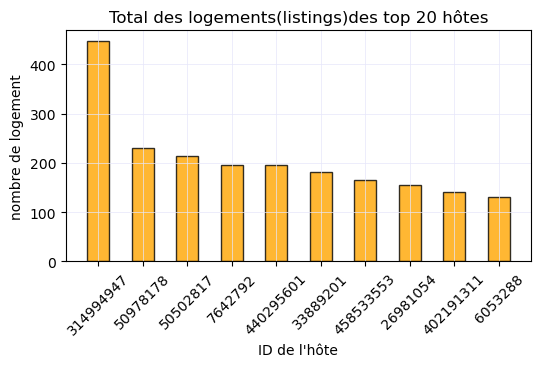

In [35]:
plt.figure(figsize=(6,3))
x = total_hosts_df["host_id"].astype(str)
y = total_hosts_df["calculated_host_listings_count"]

plt.bar(x,y, color = 'orange', width = 0.5, edgecolor='black', alpha = 0.8)
plt.xlabel("ID de l'hôte")
plt.ylabel("nombre de logement")
plt.title("Total des logements(listings)des top 20 hôtes")
plt.grid(True, color='#E6E6FA', linewidth=0.5, axis = 'both')
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, 500, 100))
plt.ylim(bottom = 0)

plt.show()



### F.2. Tracer le nombre de listings dans les top 20 regions les plus populaires

In [36]:
listings_pop = pd.DataFrame(listings_pop)
listings_pop.index.astype(str)



Index(['Buttes-Montmartre', 'Popincourt', 'Vaugirard', 'Entrepôt',
       'Batignolles-Monceau', 'Buttes-Chaumont', 'Ménilmontant', 'Passy',
       'Opéra', 'Temple', 'Reuilly', 'Observatoire', 'Bourse', 'Panthéon',
       'Hôtel-de-Ville', 'Gobelins', 'Élysée', 'Luxembourg', 'Palais-Bourbon',
       'Louvre'],
      dtype='object', name='neighbourhood_cleansed')

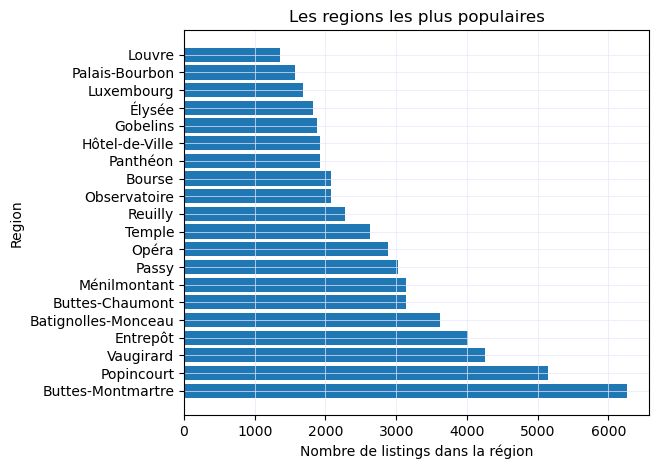

In [37]:
plt.figure(figsize=(6,5))
region = listings_pop.index.astype(str)
count_region = listings_pop["calculated_host_listings_count"]

plt.barh(y = region, width = count_region)
plt.xlabel("Nombre de listings dans la région")
plt.ylabel("Region")
plt.title("Les regions les plus populaires")
plt.grid(True, color='#E6E6FA', linewidth=0.5, axis = 'both')
plt.show()

### F.3. Visualiser le prix moyen de listing par region

In [38]:
listings_new.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'reviews_per_month',
       'nuits_reservees_365', 'revenue_annuel'],
      dtype='object')

In [39]:
region_price = listings_new.groupby('neighbourhood_cleansed')['price'].mean()
region_price = pd.DataFrame(region_price)
region_price = region_price.sort_values('price', ascending = False)

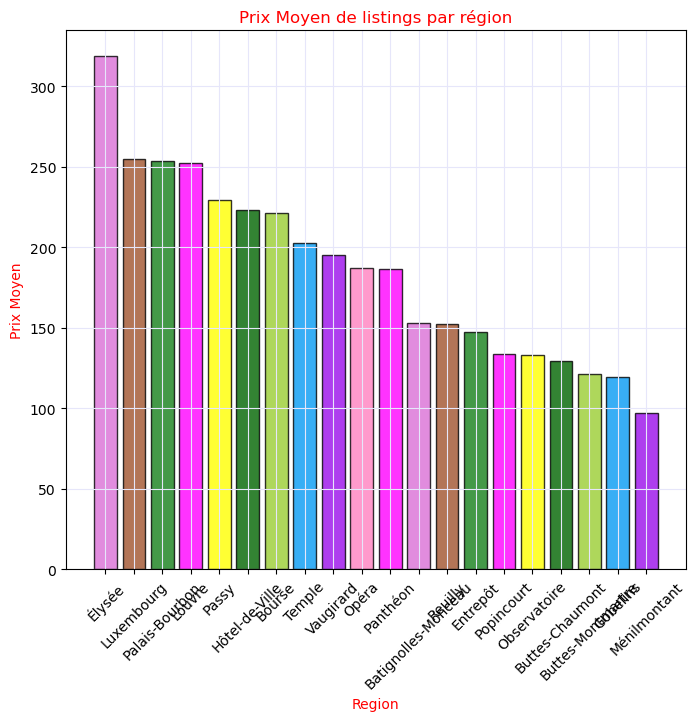

In [40]:
plt.figure(figsize=(8,7))
x = region_price.index.astype(str)
y = region_price["price"]

plt.bar(x,y, color = ['#DA70D6', '#A0522D', '#15801A', '#FF00FF', '#FFFF00', '#006400', '#9ACD32', '#069AF3', '#9A0EEA', '#FF81C0', '#FF00FF'], edgecolor='black', alpha = 0.8)
plt.xlabel("Region", color = 'r')
plt.ylabel("Prix Moyen", color = 'r')
plt.title("Prix Moyen de listings par région", color = 'r')
plt.grid(True, color='#E6E6FA', axis = 'both')
plt.xticks(rotation = 45)


plt.show()





#### Quelle est votre obeservation?



### F.4. Viualiser le pourcentage de disponibilite des listings pour plus de 270 jours, entre 180 et 270 jours, entre 90 et 180 jours, et moins de 84 jours, respectivement

In [41]:
x = listings_new['nuits_reservees_365']
len(x.values)

56726

In [42]:
x1 = x.loc[x<90].values
x2 = x.loc[(x>=90) &(x<=180)].values
x3 = x.loc[(x>=180) &(x<=270)].values
x4 = x.loc[x>=270].values

In [43]:
len(x4)/len(x.values)

0.6446250396643515

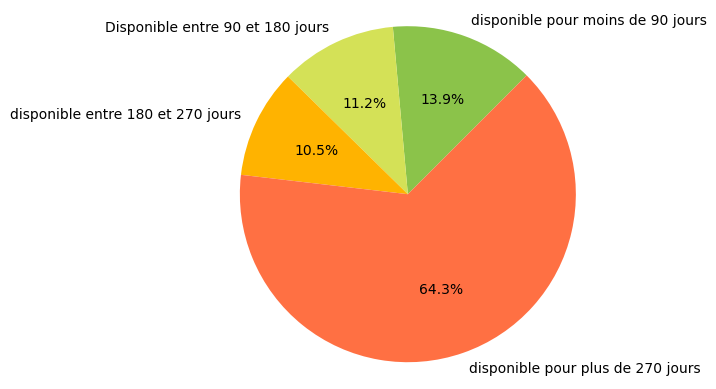

In [44]:
conditions = [
    (x<=90),
    (x>90) &(x<=180),
    (x>180) &(x<=270),
    (x>270)
]
labels = ['disponible pour moins de 90 jours' , 'Disponible entre 90 et 180 jours' , 'disponible entre 180 et 270 jours' , 'disponible pour plus de 270 jours']
couleurs= ['#8BC34A','#D4E157','#FFB300','#FF7043']
proportions = [len(x.loc[condition]) / len(x) for condition in conditions]
plt.pie(proportions,  labels = labels, autopct='%1.1f%%', startangle=45, colors=couleurs)
plt.axis('equal') 
plt.show()
  

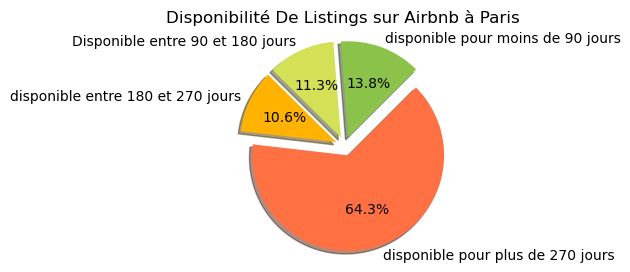

In [45]:
plt.figure(figsize=(4,3))
tickets = [len(x1)/len(x.values) , len(x2)/len(x.values) , len(x3)/len(x.values) , len(x4)/len(x.values)]
labels = ['disponible pour moins de 90 jours' , 'Disponible entre 90 et 180 jours' , 'disponible entre 180 et 270 jours' , 'disponible pour plus de 270 jours']
couleurs = ['#8BC34A','#D4E157','#FFB300','#FF7043']
plt.pie(tickets , labels = labels, autopct= '%1.1f%%', colors = couleurs, startangle = 45, shadow='true',explode=[0.1,0.1 , 0.1 , 0.1])
plt.title('Disponibilité De Listings sur Airbnb à Paris')
plt.axis('equal')
plt.show()

### F.5. Tracer le nombre total de listings dans les 10 regions les moins populaires à Paris

In [46]:
small_pop = listings_new.groupby('neighbourhood_cleansed')['calculated_host_listings_count'].count().nsmallest(10)
small_pop

neighbourhood_cleansed
Louvre            1351
Palais-Bourbon    1564
Luxembourg        1684
Élysée            1825
Gobelins          1885
Hôtel-de-Ville    1922
Panthéon          1929
Bourse            2078
Observatoire      2080
Reuilly           2272
Name: calculated_host_listings_count, dtype: int64

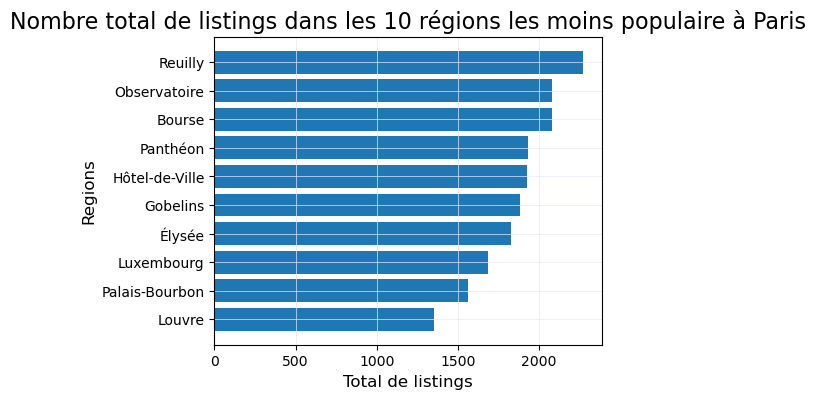

In [47]:
small_pop = pd.DataFrame(small_pop)
plt.figure(figsize=(5,4))
region = small_pop.index.astype(str)
count_region = small_pop["calculated_host_listings_count"]

plt.barh(y = region, width = count_region)
plt.xlabel("Total de listings", fontsize = 12)
plt.ylabel("Regions", fontsize = 12)
plt.title("Nombre total de listings dans les 10 régions les moins populaire à Paris", fontsize = 16)
plt.grid(True, color='#E6E6FA', linewidth=0.5, axis = 'both')
plt.show()

### F.5. Visualiser le nombre total de listing pour chaque type de logement

In [48]:
listings_new.columns


Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'reviews_per_month',
       'nuits_reservees_365', 'revenue_annuel'],
      dtype='object')

In [49]:
listings_new['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [50]:
listings_new.groupby('room_type').count()

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,...,longitude,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month,nuits_reservees_365,revenue_annuel
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,48350,48350,48350,48350,48350,48350,48350,48350,48350,48350,...,48350,48350,48350,48350,48350,48350,48350,48350,48350,48350
Hotel room,915,915,915,915,915,915,915,915,915,915,...,915,915,915,915,915,915,915,915,915,915
Private room,7172,7172,7172,7172,7172,7172,7172,7172,7172,7172,...,7172,7172,7172,7172,7172,7172,7172,7172,7172,7172
Shared room,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289


In [51]:
listings_new.groupby('room_type')['id'].count()

room_type
Entire home/apt    48350
Hotel room           915
Private room        7172
Shared room          289
Name: id, dtype: int64

In [52]:
type = listings_new.groupby('room_type')['id'].count()
type = type.sort_values(ascending = False)

In [53]:
type.index

Index(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'], dtype='object', name='room_type')

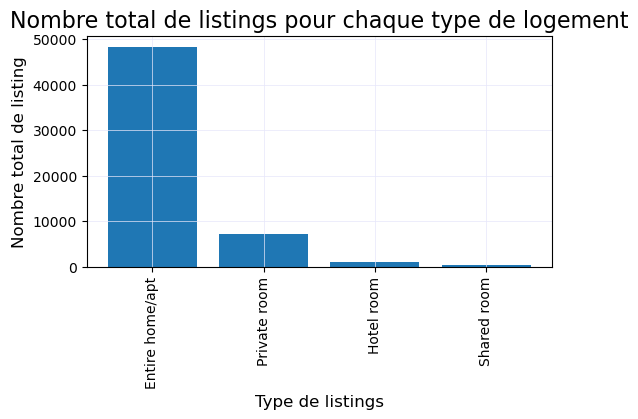

In [54]:
type = pd.DataFrame(type)
plt.figure(figsize=(6,3))
room = type.index.astype(str)
count_id = type["id"]

plt.bar(x = room, height = count_id, width = 0.8)
plt.xlabel("Type de listings", fontsize = 12)
plt.ylabel("Nombre total de listing", fontsize = 12)
plt.title("Nombre total de listings pour chaque type de logement", fontsize = 16)
plt.grid(True, color='#E6E6FA', linewidth=0.5, axis = 'both')
plt.xticks(rotation = 90)
plt.show()

### F.6. Afficher le pourcentage de chaque type de listing

In [55]:
type["id"].div(type["id"].sum()) * 100

room_type
Entire home/apt    85.234284
Private room       12.643232
Hotel room          1.613017
Shared room         0.509467
Name: id, dtype: float64

In [56]:
round((type["id"].div(type["id"].sum()) * 100),2)

room_type
Entire home/apt    85.23
Private room       12.64
Hotel room          1.61
Shared room         0.51
Name: id, dtype: float64

In [57]:
(round((type["id"].div(type["id"].sum()) * 100),2).astype(str)+"%")

room_type
Entire home/apt    85.23%
Private room       12.64%
Hotel room          1.61%
Shared room         0.51%
Name: id, dtype: object

In [58]:
type1 = round((type["id"].div(type["id"].sum()) * 100),2)
type1 = pd.DataFrame(type1)
type1.index.values

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

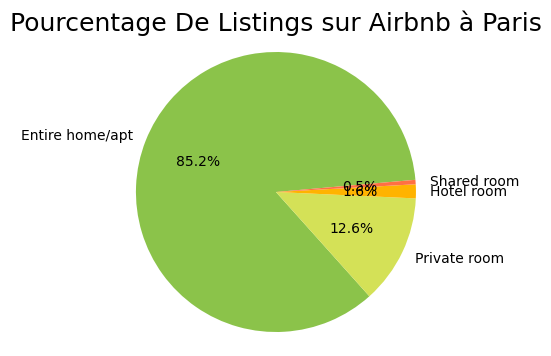

In [59]:
plt.figure(figsize=(5,4))
couleurs = ['#8BC34A','#D4E157','#FFB300','#FF7043']
plt.pie(type1['id'].values , labels = type1.index.values, autopct= '%1.1f%%', colors = couleurs, startangle = 5)
plt.title('Pourcentage De Listings sur Airbnb à Paris', fontsize = 18)
plt.axis('equal')
plt.show()

### F.7. Creer un pivot_table pour representer le nombre total de listings pour chaque type de logement par region

In [60]:
listings_new['total_listings']=listings_new.groupby('id')['id'].transform('count')
listings_new.head(1)

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,...,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month,nuits_reservees_365,revenue_annuel,total_listings
0,5396,https://www.airbnb.com/rooms/5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",7903,https://www.airbnb.com/users/show/7903,Borzou,"Paris, Ile-de-France, France",Hôtel-de-Ville,...,124.0,15,184,332,2023-02-18,1,1.99,181,22444.0,1


In [61]:
listings_new.columns


Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'reviews_per_month',
       'nuits_reservees_365', 'revenue_annuel', 'total_listings'],
      dtype='object')

In [62]:
listings_new.pivot_table(values='total_listings', index=['room_type','neighbourhood_cleansed'], aggfunc=sum)

total_listings
room_type       neighbourhood_cleansed                
Entire home/apt Batignolles-Monceau               3080
                Bourse                            1876
                Buttes-Chaumont                   2604
                Buttes-Montmartre                 5548
                Entrepôt                          3441
...                                                ...
Shared room     Popincourt                          30
                Reuilly                             18
                Temple                              11
                Vaugirard                           28
                Élysée                               5

[80 rows x 1 columns]

### F.8. Visualiser le nombre de listings par type dans les differentes regions

In [63]:
listings_region =listings_new.pivot_table(values='total_listings', index=['room_type','neighbourhood_cleansed'], aggfunc=sum)
listings_region1 = pd.DataFrame(listings_region)
listings_region2 = listings_region1.reset_index()
listings_region2


,room_type,neighbourhood_cleansed,total_listings
0,Entire home/apt,Batignolles-Monceau,3080
1,Entire home/apt,Bourse,1876
2,Entire home/apt,Buttes-Chaumont,2604
3,Entire home/apt,Buttes-Montmartre,5548
4,Entire home/apt,Entrepôt,3441
...,...,...,...
75,Shared room,Popincourt,30
76,Shared room,Reuilly,18
77,Shared room,Temple,11
78,Shared room,Vaugirard,28


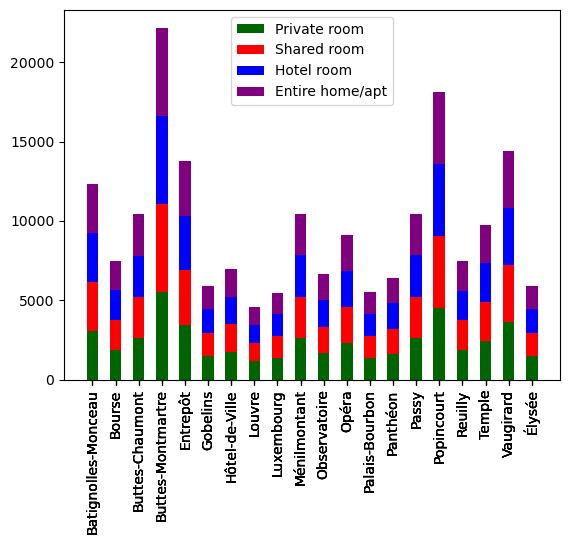

,room_type,neighbourhood_cleansed,total_listings
0,Entire home/apt,Batignolles-Monceau,3080
1,Entire home/apt,Bourse,1876
2,Entire home/apt,Buttes-Chaumont,2604
3,Entire home/apt,Buttes-Montmartre,5548
4,Entire home/apt,Entrepôt,3441
...,...,...,...
75,Shared room,Popincourt,30
76,Shared room,Reuilly,18
77,Shared room,Temple,11
78,Shared room,Vaugirard,28


In [64]:

y = listings_region2["total_listings"]
p1 = listings_region2[listings_region2['room_type'] == 'Private room'].reset_index(drop=True)
p2 = listings_region2[listings_region2['room_type'] == 'Shared room'].reset_index(drop=True)
p3 = listings_region2[listings_region2['room_type'] == 'Hotel room'].reset_index(drop=True)
p4 = listings_region2[listings_region2['room_type'] == 'Entire home/apt'].reset_index(drop=True)
x = listings_region2["neighbourhood_cleansed"]

plt.bar(x[p1.index], y[p1.index], width=0.5, align='center', color='darkgreen', label='Private room')
plt.bar(x[p2.index], y[p2.index], width=0.5, align='center', bottom=y[p1.index], color='red', label='Shared room')
plt.bar(x[p3.index], y[p3.index], width=0.5, align='center', bottom=y[p1.index] + y[p2.index], color='blue', label='Hotel room')
plt.bar(x[p4.index], y[p4.index], width=0.5, align='center', bottom=y[p1.index] + y[p2.index] + y[p3.index], color='#800080', label='Entire home/apt')

plt.xticks( x,rotation = 90)
plt.legend()
plt.show()
listings_region2


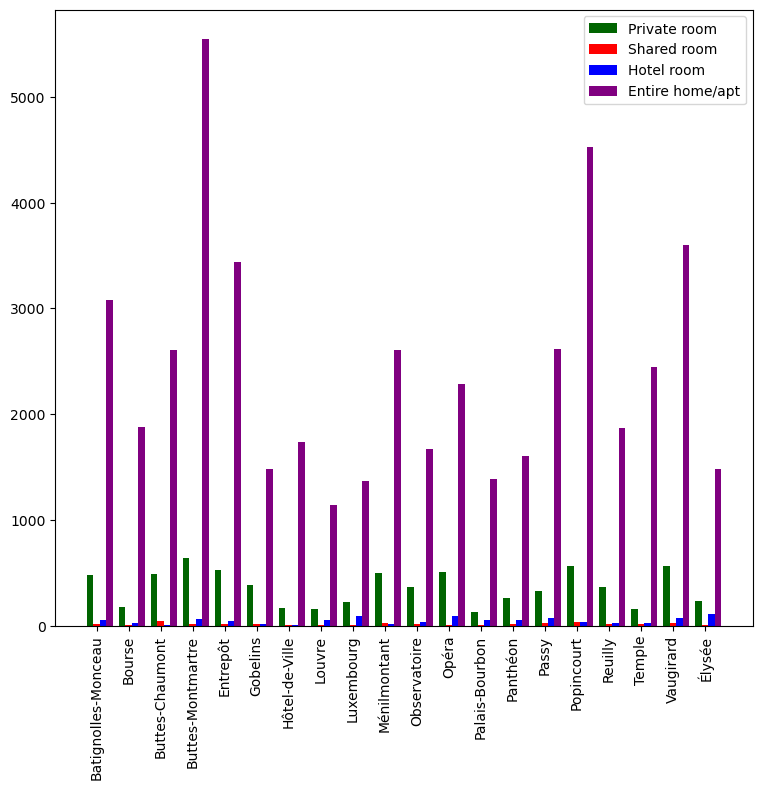

In [65]:
plt.figure(figsize= (9,8))
# Réinitialiser les index
p1 = p1.reset_index(drop=True)
p2 = p2.reset_index(drop=True)
p3 = p3.reset_index(drop=True)
p4 = p4.reset_index(drop=True)

# Définir la largeur des barres
barWidth = 0.2

# Définir la position des barres sur l'axe x
r1 = np.arange(len(p1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Créer les barres
plt.bar(r1, p1["total_listings"], width=barWidth, color='darkgreen', label='Private room')
plt.bar(r2, p2["total_listings"], width=barWidth, color='red', label='Shared room')
plt.bar(r3, p3["total_listings"], width=barWidth, color='blue', label='Hotel room')
plt.bar(r4, p4["total_listings"], width=barWidth, color='#800080', label='Entire home/apt')

# Ajouter les noms des quartiers sur l'axe x
plt.xticks([r + barWidth for r in range(len(p1))], p1["neighbourhood_cleansed"], rotation=90)
plt.legend()
plt.show()


# Observation:

### F.9. Creer un pivot_table pour representer le prix moyen pour chaque type de listing par region

In [66]:
listings_new.pivot_table(values='price', index=['room_type','neighbourhood_cleansed'], aggfunc='mean')

price
room_type       neighbourhood_cleansed            
Entire home/apt Batignolles-Monceau     149.201948
                Bourse                  215.380064
                Buttes-Chaumont         137.347926
                Buttes-Montmartre       121.301911
                Entrepôt                152.768672
...                                            ...
Shared room     Popincourt               58.733333
                Reuilly                  43.722222
                Temple                  111.454545
                Vaugirard                50.071429
                Élysée                   68.600000

[80 rows x 1 columns]

In [67]:
listings_new.pivot_table(values='total_listings', index=['room_type','neighbourhood_cleansed'], aggfunc=sum)

total_listings
room_type       neighbourhood_cleansed                
Entire home/apt Batignolles-Monceau               3080
                Bourse                            1876
                Buttes-Chaumont                   2604
                Buttes-Montmartre                 5548
                Entrepôt                          3441
...                                                ...
Shared room     Popincourt                          30
                Reuilly                             18
                Temple                              11
                Vaugirard                           28
                Élysée                               5

[80 rows x 1 columns]

### F.10. Visualiser le prix moyen des "Shared room" par region

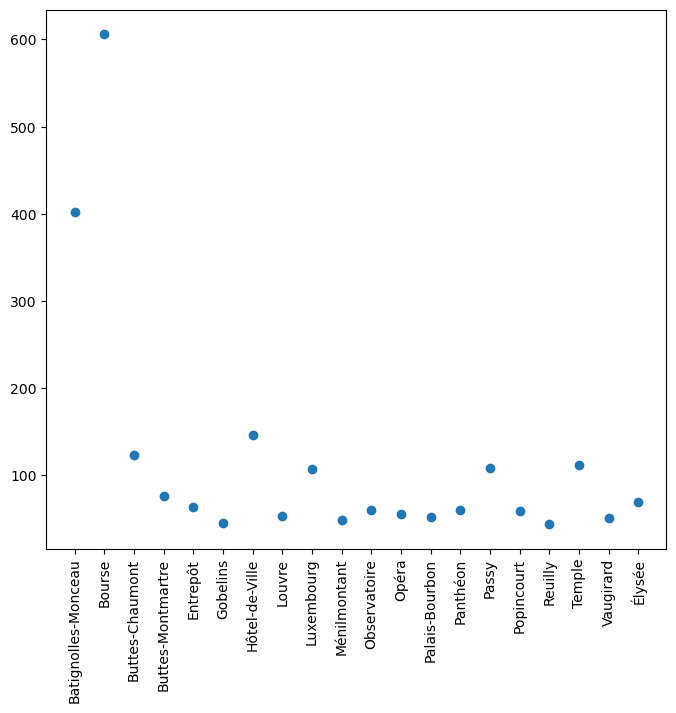

In [68]:
room_price = listings_new.pivot_table(values='price', index=['room_type','neighbourhood_cleansed'], aggfunc='mean')
room_price = pd.DataFrame(room_price)
room_price1 = room_price.reset_index()
x = room_price1[room_price1['room_type']== 'Shared room'].index
x1 = room_price1['neighbourhood_cleansed']
y = room_price1['price']
plt.figure(figsize=(8,7))
plt.scatter(x1[x], y[x] )
plt.xticks(rotation = 90)
plt.show()


### F.11. Afficher le boxplot des prix des regions Louvre pour les listings dont le prix < 500

In [69]:
louvre_price = listings_new.loc[(listings_new['neighbourhood_cleansed']=='Louvre')&(listings_new['price']<500),'price']
louvre_price

3         75.0
19       272.0
27       150.0
45       270.0
48       359.0
         ...  
56194    100.0
56275    133.0
56340    276.0
56505    303.0
56522    398.0
Name: price, Length: 1227, dtype: float64

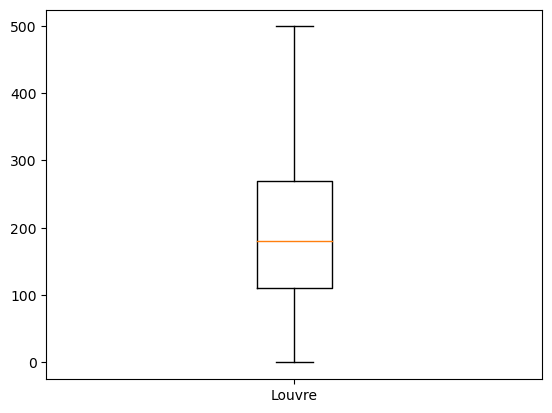

In [70]:
# Création de la figure et de l'axe
fig, ax = plt.subplots()
ax.boxplot(louvre_price)
label = ['Louvre']
ax.set_xticklabels(label)
plt.show()

### F.12.  Visualisation par zone de la disponibilité des annonces

In [71]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [71]:
listings_geo = listings[['neighbourhood_cleansed','latitude', 'longitude']]



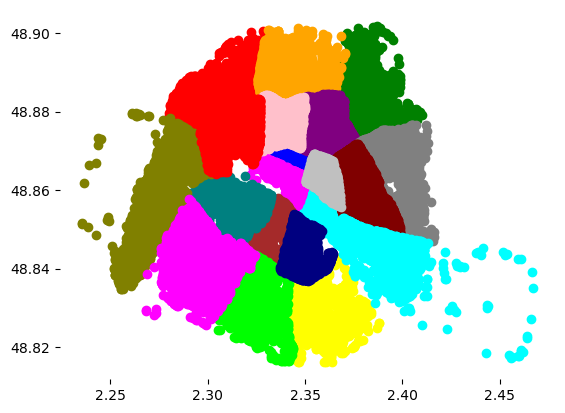

In [75]:
groupes = listings_geo.groupby('neighbourhood_cleansed')

# Génération d'une palette de couleurs pour chaque zone
couleurs = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray',
            'lime', 'pink', 'teal', 'navy', 'olive', 'maroon', 'aqua', 'silver', 'fuchsia']

# Création d'un graphique
fig = plt.figure()
ax = fig.add_subplot()
for i, (groupe, data) in enumerate(groupes):
    # Obtention de l'index numérique du groupe
    index = list(groupes.groups.keys()).index(groupe)
    # Attribution d'une couleur spécifique à chaque groupe/zone
    couleur = couleurs[index % len(couleurs)]
    # Affichage des données pour le groupe/zone avec la couleur correspondante
    ax.scatter(data['longitude'], data['latitude'], color=couleur, label=groupe, marker='o')

# Ajouter une légende
#ax.legend()

# Ajouter les contours des côtes
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Affichage du graphique
plt.show()


### F.13. Récupérez les 100 annonces avec le plus grand nombre de commentaires à Paris

In [76]:
listings_new.columns

Index(['id', 'listing_url', 'name', 'description', 'neighborhood_overview',
       'host_id', 'host_url', 'host_name', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'availability_365', 'number_of_reviews',
       'last_review', 'calculated_host_listings_count', 'reviews_per_month',
       'nuits_reservees_365', 'revenue_annuel', 'total_listings'],
      dtype='object')

In [78]:
annonce = listings_new.nlargest(100, 'number_of_reviews')
annonce 

,id,listing_url,name,description,neighborhood_overview,host_id,host_url,host_name,neighbourhood,neighbourhood_cleansed,...,price,minimum_nights,availability_365,number_of_reviews,last_review,calculated_host_listings_count,reviews_per_month,nuits_reservees_365,revenue_annuel,total_listings
21647,26244787,https://www.airbnb.com/rooms/26244787,"Double/Twin Room, close to Opera and the Louvr...",<b>The space</b><br />The Daunou Opera enjoys ...,0,98020850,https://www.airbnb.com/users/show/98020850,Lionel,0,Bourse,...,364.0,1,337,2524,2023-03-12,8,49.55,28,10192.0,1
14749,17222007,https://www.airbnb.com/rooms/17222007,Sweet & cosy room next to Canal Saint Martin ❤️,The room is located right in the heart of la R...,The room I offer is right in the middle of a v...,84901734,https://www.airbnb.com/users/show/84901734,Alexandra,"Paris, Île-de-France, France",Entrepôt,...,147.0,1,99,2052,2023-02-27,5,28.79,266,39102.0,1
31468,41020735,https://www.airbnb.com/rooms/41020735,"Bed in Dorm of 8 Beds ""The Big One"" in Paris","Welcome to Les Piaules, our hostel & bar in do...",Les Piaules hostel is located in Paris arty & ...,315206797,https://www.airbnb.com/users/show/315206797,Les Piaules,"Paris, Île-de-France, France",Popincourt,...,41.0,1,364,1647,2023-02-27,11,44.19,1,41.0,1
26941,35145338,https://www.airbnb.com/rooms/35145338,Nice Room for 2 people,Hotel de l'Aqueduc is located near the center ...,0,264483496,https://www.airbnb.com/users/show/264483496,Hotel De L’Aqueduc,0,Entrepôt,...,124.0,1,227,1433,2023-03-10,4,35.83,138,17112.0,1
30717,40194697,https://www.airbnb.com/rooms/40194697,Comfortable bed in shared rooms of 8 in Paris 12e,Kick your journey off with a coffee on the 8th...,"Make your stay a magic, cocooning and romantic...",309707704,https://www.airbnb.com/users/show/309707704,The People Paris Bercy,"Paris, Île-de-France, France",Reuilly,...,42.0,1,106,1420,2023-02-27,10,35.41,259,10878.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,10948338,https://www.airbnb.com/rooms/10948338,"Paris je t’aime ,Montmartre village",Joli appartement rénové de 3 pièces dans le qu...,L'appartement est situé au cœur du village Mon...,50631208,https://www.airbnb.com/users/show/50631208,Laurent,"Paris, Île-de-France, France",Buttes-Montmartre,...,150.0,3,254,462,2023-02-25,4,5.34,111,16650.0,1
2062,2464417,https://www.airbnb.com/rooms/2464417,PARIS 1er CENTER - MUSEE DU LOUVRE,"This charming Parisian flat, recently renovate...",A few hundred meters from the Opera and the Lo...,6851238,https://www.airbnb.com/users/show/6851238,Victoria,"Paris, Île-de-France, France",Louvre,...,245.0,1,94,461,2023-02-27,4,4.27,271,66395.0,1
9583,10614603,https://www.airbnb.com/rooms/10614603,Studio in Montmartre,"Cozy studio, stunning views over the rooftops ...",The area is very close to the Sacre Coeur and ...,54776077,https://www.airbnb.com/users/show/54776077,Vladimir,"Paris, Île-de-France, France",Buttes-Montmartre,...,65.0,1,166,459,2023-03-10,1,5.29,199,12935.0,1
18457,21780368,https://www.airbnb.com/rooms/21780368,Beautiful Family Apartment in central Paris,(Attention : Voisins sensibles au bruit. Fêtes...,0,9304128,https://www.airbnb.com/users/show/9304128,Louise,0,Élysée,...,500.0,1,135,459,2023-03-11,10,7.09,230,115000.0,1


### F.14. Trouver le prix moyen des 100 annonces les plus préférées

In [80]:
print('Average price per night :',annonce['price'].mean())

Average price per night : 143.41


### F.15. Trouver le prix moyen des 100 annonces les plus préférées par type de logement

In [84]:
annonce.groupby('room_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,46.0,157.304348,96.044173,52.0,89.25,127.5,199.75,500.0
Hotel room,15.0,204.666667,61.555627,124.0,156.50,210.0,230.50,364.0
Private room,35.0,110.371429,63.326923,37.0,62.50,84.0,148.00,249.0
Shared room,4.0,43.000000,2.160247,41.0,41.75,42.5,43.75,46.0


# Observation:



## G. Connection au serveur PostgreSQL

### G.1. Connecter a la base de donnee M2i

In [ ]:
#importer librairies


In [101]:
#connecter a la base de donnee M2i
conn = pg.connect("dbname = m2i  user = postgres  password = 1234")


In [102]:
##creer un curseur
curseur= conn.cursor()
# creer table airbnb_paris_listings_m2i avec l'id
requete = "CREATE TABLE public.airbnb_paris_listings_m2i( id numeric NOT NULL)"

#executer la requete
curseur.execute(requete)
conn.commit()




### G.2. Creer table airbnb_paris_listings_m2i

In [103]:
#dictionnaire de types
dict_type={'int64':'decimal', 'object':'text', 'float64':'real', 'datetime64[ns]':'date'}
dict_type['int64']

'decimal'

In [106]:
# preparer requete pour ajouter de nouvelles colonnes a la table airbnb_paris_listings_m2i
table_name = 'airbnb_paris_listings_m2i'
requete2 = 'alter table ' + table_name 
for i,attribut in enumerate(listings_new.columns):
    if(listings_new[attribut].dtype)=="datetime64[ns]":
        print(attribut)
    if(i==0):
        continue
    requete2 += ' add column ' + attribut+ " " + dict_type[str(listings_new[attribut].dtype) ] 
    if(i<len(listings_new.columns)-1):
        requete2+=','+ '\n'

last_review


In [ ]:
print(requete2)

In [107]:
#Executer la requete 
curseur.execute(requete2)
conn.commit()


### G.3. Inserer les donnees dans la table

In [110]:
#sauvegrader les donnees du dataframe dans une liste de tuples
liste=listings_new.to_numpy()
liste1 = [tuple(x) for x in liste]

In [111]:
#executer la requete convenable pour inserer les donnees dans la table
requete3 = "Insert into airbnb_paris_listings_m2i values %s"
extras.execute_values(curseur, requete3, liste1)
conn.commit()


In [119]:
conn.rollback()

In [120]:
#lire la prmemiere ligne de la table 
requete4 = "select * from airbnb_paris_listings_m2i"
curseur.execute(requete4)
curseur.fetchone()

(Decimal('5396'),
 'https://www.airbnb.com/rooms/5396',
 'Explore the heart of old Paris',
 "Cozy, well-appointed and graciously designed studio apartment that mixes old and new aesthetics at the very heart of Paris, on the famous Isle St Louis that is a stone's throw from Le Marais, Quartier Latin, Notre Dame and Le Louvre.<br /><br /><b>The space</b><br />Small, well appointed studio apartment at the very heart of Paris, on the famous Isle St Louis.<br /><br />We are looking for quiet persons or couples to rent our fully equipped studio (about 30 square meters or 300 square feet) in central Paris on the famous Isle St. Louis.<br /><br />No smoking and parties are forbidden<br /><br />The location is superb in heart of Paris and to close to all amenities (buses, metro, velib)<br /><br />No street view or Seine view, the best is the localisation<br />The flat is at the 2nd floor (no lift), quiet because it's on courtyard<br /><br /><b>Guest access</b><br />The flat includes :<br /> - A

### G4. Lire le fichier reviews.csv

In [122]:
reviews = pd.read_csv('reviews.csv')
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...
1,5396,4968,2009-07-03,20117,Chris,This is a nice place in a great location in Pa...
2,5396,5240,2009-07-08,22190,Annelaure,"Nice studio, very clean, very quiet, in a grea..."
3,5396,9619,2009-09-10,11947,Jean,"Superb location, great studio. \r<br/>A slice ..."
4,5396,18970,2009-12-02,40625,Bette,"Perfect place to be in Paris, walking home eve..."
...,...,...,...,...,...,...
1406840,841098282163198255,843291085006646784,2023-03-09,4922754,Lepa,Saghi's Apartment war in allen Belangen perfek...
1406841,841150108420966342,844804494310843508,2023-03-11,471418296,Marina,"Karim was very helpful, location is really nic..."
1406842,836377618882544002,841113857201400430,2023-03-06,499882804,Joaquim,Lila a été très serviable... elle a donné tout...
1406843,841150108420966342,845520563689982465,2023-03-12,426936116,Axel,Logement convenable pour une nuit et pour sa l...


### G5. Mettre en minuscules les commentaires

In [124]:
reviews['comments']=reviews['comments'].str.lower()

### G6. Creer une table airbnb_paris_reviews avec les differentes colonnes

In [126]:
requete5 = "CREATE TABLE airbnb_paris_reviews( listing_id numeric, id numeric NOT NULL,date date,reviewer_id integer,reviewer_name text COLLATE pg_catalog.default,comments text COLLATE pg_catalog.default)"

#executer la requete
curseur.execute(requete5)
conn.commit()

### G7. Inserer les donnees traitees de reviews.csv dans la table reviews

In [131]:
conn.rollback()

In [132]:
reviews1 = reviews.to_numpy()
reviews2 = [tuple(x) for x in reviews1]
requete6 = "Insert into airbnb_paris_reviews values %s"
extras.execute_values(curseur, requete6, reviews2)
conn.commit()

### G8. Executer la commande Postgresql pour sélectionner l’id, le nom, et le lien des 100 hôtes avec le plus grand nombre de complaintes.

In [136]:
requete7 = "select  max(l.host_id)as host_id,  l.host_name, max(l.host_url)as host_url from airbnb_paris_reviews r inner join airbnb_paris_listings_m2i l on l.id = r.listing_id where comments like '%dirty%' or comments like'%bad%' group by l.host_name order by count (l.host_name) desc limit 100"
curseur.execute(requete7)
curseur.fetchall()


[(Decimal('504268004'),
  'Joffrey',
  'https://www.airbnb.com/users/show/504268004'),
 (Decimal('151249632'),
  'Cédric',
  'https://www.airbnb.com/users/show/76057060'),
 (Decimal('458019618'),
  'Philippe',
  'https://www.airbnb.com/users/show/811644'),
 (Decimal('500577269'), 'Marie', 'https://www.airbnb.com/users/show/9942269'),
 (Decimal('176909471'),
  'Sebastien',
  'https://www.airbnb.com/users/show/9773027'),
 (Decimal('478549738'),
  'GuestReady',
  'https://www.airbnb.com/users/show/65054032'),
 (Decimal('441008096'),
  'Guillaume',
  'https://www.airbnb.com/users/show/936281'),
 (Decimal('226958437'),
  'OpenFlats',
  'https://www.airbnb.com/users/show/226958437'),
 (Decimal('254947929'),
  'Xavier',
  'https://www.airbnb.com/users/show/83505873'),
 (Decimal('490590911'),
  'Nicolas',
  'https://www.airbnb.com/users/show/9909066'),
 (Decimal('95389398'),
  'Laurent And Lisa From Rent A Room',
  'https://www.airbnb.com/users/show/95389398'),
 (Decimal('499455091'), 'Pierre'

(Decimal('26981054'), 'https://www.airbnb.com/users/show/26981054', 'Cédric', 90)
(Decimal('2107478'), 'https://www.airbnb.com/users/show/2107478', 'Philippe', 77)
(Decimal('95389398'), 'https://www.airbnb.com/users/show/95389398', 'Laurent And Lisa From Rent A Room', 50)
(Decimal('402191311'), 'https://www.airbnb.com/users/show/402191311', 'GuestReady', 45)
(Decimal('440992832'), 'https://www.airbnb.com/users/show/440992832', 'Joffrey', 40)
(Decimal('226958437'), 'https://www.airbnb.com/users/show/226958437', 'OpenFlats', 39)
(Decimal('440992928'), 'https://www.airbnb.com/users/show/440992928', 'Joffrey', 37)
(Decimal('50978178'), 'https://www.airbnb.com/users/show/50978178', 'Sebastien', 37)
(Decimal('11593703'), 'https://www.airbnb.com/users/show/11593703', 'Pick A Flat', 35)
(Decimal('374552379'), 'https://www.airbnb.com/users/show/374552379', 'Joffrey', 34)
(Decimal('46443228'), 'https://www.airbnb.com/users/show/46443228', 'Xavier', 28)
(Decimal('28313443'), 'https://www.airbnb.com/users/show/28313443', 'Michael & Johanna', 26)
(Decimal('59915865'), 'https://www.airbnb.com/users/show/59915865', 'Mathilde', 26)
(Decimal('479175248'), 'https://www.airbnb.com/users/show/479175248', 'Joffrey', 25)
(Decimal('3950352'), 'https://www.airbnb.com/users/show/3950352', 'Bea', 23)
(Decimal('97083775'), 'https://www.airbnb.com/users/show/97083775', 'Room4me', 21)
(Decimal('435014515'), 'https://www.airbnb.com/users/show/435014515', 'Benvini Paris', 20)
(Decimal('45870793'), 'https://www.airbnb.com/users/show/45870793', 'Margaux', 19)
(Decimal('30685353'), 'https://www.airbnb.com/users/show/30685353', 'Elodie', 19)
(Decimal('22563088'), 'https://www.airbnb.com/users/show/22563088', 'Yankel', 18)
(Decimal('125797498'), 'https://www.airbnb.com/users/show/125797498', 'Welkeys', 18)
(Decimal('374553401'), 'https://www.airbnb.com/users/show/374553401', 'Checkmyguest', 18)
(Decimal('51567288'), 'https://www.airbnb.com/users/show/51567288', 'Sweet Inn', 17)
(Decimal('7642792'), 'https://www.airbnb.com/users/show/7642792', 'Ludovic', 17)
(Decimal('222375907'), 'https://www.airbnb.com/users/show/222375907', 'Arnaud', 17)
(Decimal('496382899'), 'https://www.airbnb.com/users/show/496382899', 'Joffrey', 16)
(Decimal('156775524'), 'https://www.airbnb.com/users/show/156775524', 'Merveil', 15)
(Decimal('152242'), 'https://www.airbnb.com/users/show/152242', 'Delphine', 15)
(Decimal('296065217'), 'https://www.airbnb.com/users/show/296065217', 'Hatch', 14)
(Decimal('309243009'), 'https://www.airbnb.com/users/show/309243009', 'Peter', 14)
(Decimal('335998296'), 'https://www.airbnb.com/users/show/335998296', 'Studioprestige', 13)
(Decimal('396754479'), 'https://www.airbnb.com/users/show/396754479', 'HappyCulture', 13)
(Decimal('4574124'), 'https://www.airbnb.com/users/show/4574124', 'Eric', 13)
(Decimal('474441983'), 'https://www.airbnb.com/users/show/474441983', 'Lisa', 12)
(Decimal('6053288'), 'https://www.airbnb.com/users/show/6053288', 'Anna', 12)
(Decimal('193397737'), 'https://www.airbnb.com/users/show/193397737', 'Mtp', 12)
(Decimal('84627590'), 'https://www.airbnb.com/users/show/84627590', 'Mercedes', 12)
(Decimal('9304128'), 'https://www.airbnb.com/users/show/9304128', 'Louise', 12)
(Decimal('50502817'), 'https://www.airbnb.com/users/show/50502817', 'Pierre De WeHost', 11)
(Decimal('496378886'), 'https://www.airbnb.com/users/show/496378886', 'Joffrey', 11)
(Decimal('486198067'), 'https://www.airbnb.com/users/show/486198067', 'Andreas', 11)
(Decimal('435017340'), 'https://www.airbnb.com/users/show/435017340', 'Joie Paris', 11)
(Decimal('479170945'), 'https://www.airbnb.com/users/show/479170945', 'Joffrey', 11)
(Decimal('333389330'), 'https://www.airbnb.com/users/show/333389330', 'Steve', 11)
(Decimal('10380481'), 'https://www.airbnb.com/users/show/10380481', 'Rosa', 11)
(Decimal('12136845'), 'https://www.airbnb.com/users/show/12136845', 'Alexandre', 11)
(Decimal('300765938'), 'https://www.airbnb.com/users/show/300765938', 'Xacco', 11)
(Decimal('236512753'), 'https://www.airbnb.com/users/show/236512753', 'Guest Adom', 10)
(Decimal('108711230'), 'https://www.airbnb.com/users/show/108711230', 'Yoni', 10)
(Decimal('1606856'), 'https://www.airbnb.com/users/show/1606856', 'Vincent', 10)
(Decimal('117297906'), 'https://www.airbnb.com/users/show/117297906', 'Michel Et Amina', 10)
(Decimal('10916245'), 'https://www.airbnb.com/users/show/10916245', 'Benjamin', 10)
(Decimal('24391962'), 'https://www.airbnb.com/users/show/24391962', 'Sebastien', 10)
(Decimal('59372953'), 'https://www.airbnb.com/users/show/59372953', 'Ruben', 10)
(Decimal('147018685'), 'https://www.airbnb.com/users/show/147018685', 'Les Patios Du Marais', 9)
(Decimal('227195075'), 'https://www.airbnb.com/users/show/227195075', 'Vanessa', 9)
(Decimal('1112584'), 'https://www.airbnb.com/users/show/1112584', 'IntoParis', 9)
(Decimal('5598504'), 'https://www.airbnb.com/users/show/5598504', 'Xavier', 9)
(Decimal('183489963'), 'https://www.airbnb.com/users/show/183489963', 'Naïm', 8)
(Decimal('39602261'), 'https://www.airbnb.com/users/show/39602261', 'Ayamé  Et Guillaume', 8)
(Decimal('42782996'), 'https://www.airbnb.com/users/show/42782996', 'Suqin', 8)
(Decimal('5027164'), 'https://www.airbnb.com/users/show/5027164', 'International Home Owners', 8)
(Decimal('3049533'), 'https://www.airbnb.com/users/show/3049533', 'Simon', 8)
(Decimal('13013633'), 'https://www.airbnb.com/users/show/13013633', 'The French Concierge', 8)
(Decimal('129866086'), 'https://www.airbnb.com/users/show/129866086', 'Petter', 8)
(Decimal('344501056'), 'https://www.airbnb.com/users/show/344501056', 'Alex', 8)
(Decimal('374635441'), 'https://www.airbnb.com/users/show/374635441', 'Joffrey', 7)
(Decimal('2762084'), 'https://www.airbnb.com/users/show/2762084', 'Lancelot', 7)
(Decimal('77080326'), 'https://www.airbnb.com/users/show/77080326', 'Olivier', 7)
(Decimal('80190241'), 'https://www.airbnb.com/users/show/80190241', 'Alain', 7)
(Decimal('99040006'), 'https://www.airbnb.com/users/show/99040006', 'Jérémy', 7)
(Decimal('98087989'), 'https://www.airbnb.com/users/show/98087989', 'Arthur', 7)
(Decimal('37094752'), 'https://www.airbnb.com/users/show/37094752', 'David', 7)
(Decimal('7612270'), 'https://www.airbnb.com/users/show/7612270', 'Sweet Inn', 7)
(Decimal('119572344'), 'https://www.airbnb.com/users/show/119572344', 'John', 7)

### G9. Afficher les resultats sous forme d'un dataframe

In [140]:
requete7 = "select  max(l.host_id)as host_id,  l.host_name, max(l.host_url)as host_url from airbnb_paris_reviews r inner join airbnb_paris_listings_m2i l on l.id = r.listing_id where comments like '%dirty%' or comments like'%bad%' group by l.host_name order by count (l.host_name) desc limit 100"
curseur.execute(requete7)
res = curseur.fetchall()
res1 = pd.DataFrame(res)
res1  = res1 .rename(columns={0: 'id', 1: 'name', 2:'links'})
res1

,id,name,links
0,504268004,Joffrey,https://www.airbnb.com/users/show/504268004
1,151249632,Cédric,https://www.airbnb.com/users/show/76057060
2,458019618,Philippe,https://www.airbnb.com/users/show/811644
3,500577269,Marie,https://www.airbnb.com/users/show/9942269
4,176909471,Sebastien,https://www.airbnb.com/users/show/9773027
...,...,...,...
95,394651140,Diane,https://www.airbnb.com/users/show/7522848
96,457296384,Peter,https://www.airbnb.com/users/show/457296384
97,468157743,Julia,https://www.airbnb.com/users/show/96849050
98,492846447,Lionel,https://www.airbnb.com/users/show/98020850
